## 0. Imports

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor


## 1. Data Loading

In [2]:
train = pd.read_csv('../data/diamonds_train.csv')
test = pd.read_csv('../data/diamonds_test.csv')
sample_sub = pd.read_csv('../data/sample_submission.csv')

## 2. Exploratory data analysis

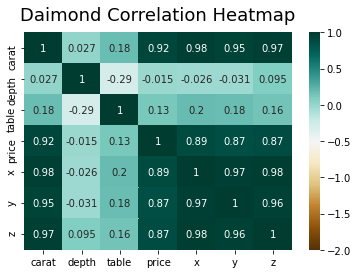

In [3]:
heatmap = sns.heatmap(train.corr(), vmin=-2, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Daimond Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

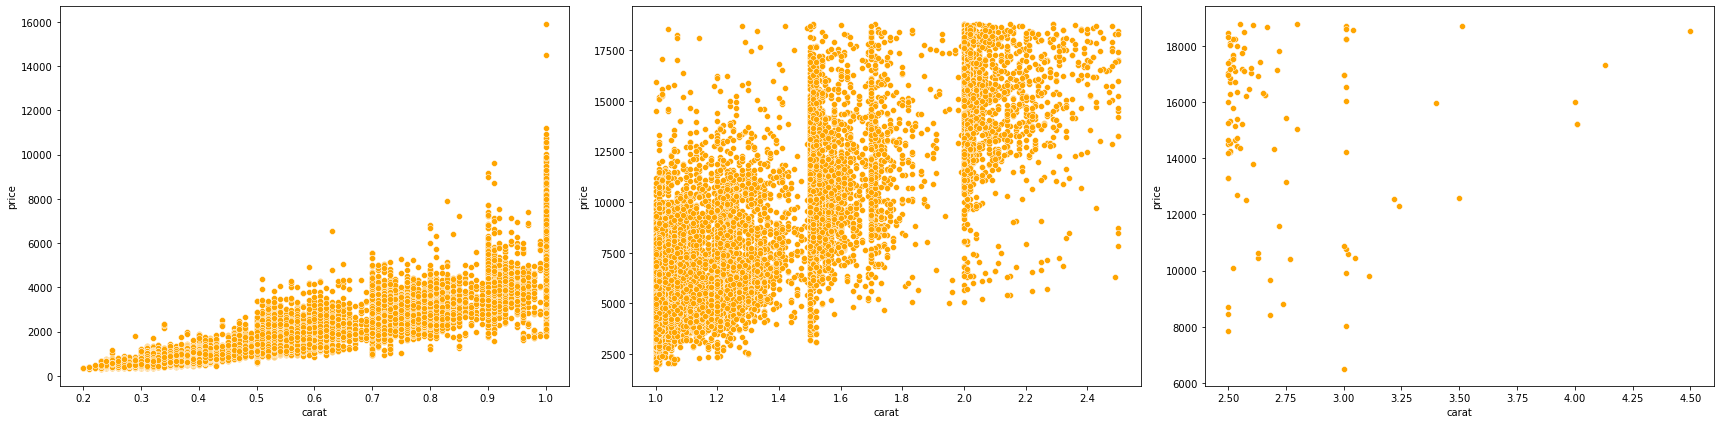

In [4]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

sns.scatterplot(data=train[train['carat'].between(0, 1)], x='carat', y='price', color ='orange',  ax=axes[0]);
sns.scatterplot(data=train[train['carat'].between(1, 2.5)], x='carat', y='price', color ='orange', ax=axes[1]);
sns.scatterplot(data=train[train['carat'].between(2.5, 4.5)], x='carat', y='price', color ='orange',  ax=axes[2]);
plt.tight_layout()
plt.show()

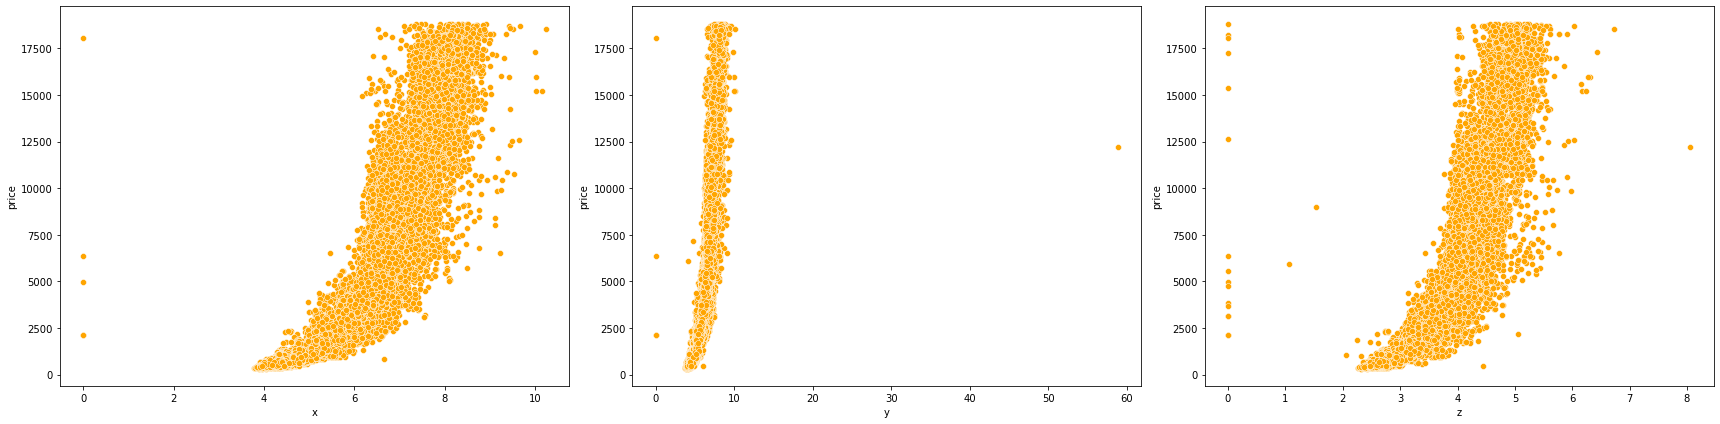

In [5]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))

sns.scatterplot(data=train, x='x', y='price', color ='orange', ax=axes[0]);
sns.scatterplot(data=train, x='y', y='price', color ='orange', ax=axes[1]);
sns.scatterplot(data=train, x='z', y='price', color ='orange',  ax=axes[2]);



plt.tight_layout()
plt.show()

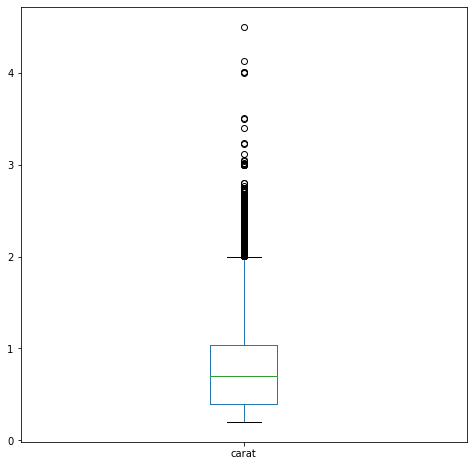

In [6]:
train['carat'].plot(kind='box', figsize=(8,8));

## 3. Modeling

In [7]:
target = 'price'

feature_cols = ['cut', 
                'color', 
                'clarity']


numeric_cols = ['carat',
                'depth',
                'table',
                'x', 
                'y', 
                'z']

# Converting object dtype into category dtype.

for i in feature_cols:
    
    train[i] = train[i].astype('category')
    test[i] = test[i].astype('category')
    

In [8]:
cat_df = pd.get_dummies(train[feature_cols])
num_df = train.loc[:,numeric_cols]

df_train = pd.concat([cat_df, num_df], axis=1)
df_train.head(3)

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1.21,62.4,58.0,6.83,6.79,4.25
1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0.32,63.0,57.0,4.35,4.38,2.75
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0.71,65.5,55.0,5.62,5.53,3.65


In [9]:
cat_df = pd.get_dummies(test[feature_cols])
num_df = test.loc[:,numeric_cols]
df_test = pd.concat([cat_df, num_df], axis=1)
df_test.head(3)

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0.79,62.7,60.0,5.82,5.89,3.67
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1.20,61.0,57.0,6.81,6.89,4.18
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1.57,62.2,61.0,7.38,7.32,4.57


In [10]:
features = list(cat_df.columns) + list(num_df.columns)
features

['cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'carat',
 'depth',
 'table',
 'x',
 'y',
 'z']

In [11]:
X = df_train[features]
y = train[target]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

NameError: name 'train_test_split' is not defined

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30341, 26), (10114, 26), (30341,), (10114,))

In [14]:
models = {
        "LGBMRegressor": LGBMRegressor(),   
        "RandomForest": RandomForestRegressor(),
        "GradientBoostRegressor": GradientBoostingRegressor(),   
        "DecissionTreeRegressor": DecisionTreeRegressor(),   
        "LinearRegression": LinearRegression(),
        "RidgeRegression": Ridge(alpha=1),
        "LassoRegression": Lasso(alpha=1),

    
}


In [15]:
metrics = pd.DataFrame()

for model_name, model in models.items():
    
    print(f"Training model: {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    
    metricas = pd.DataFrame([rmse],
                            index=["RMSE"],
                            columns=[model_name])
    
    metrics = pd.concat([metrics, metricas], axis=1)


metrics


Training model: LGBMRegressor
Training model: RandomForest
Training model: GradientBoostRegressor
Training model: DecissionTreeRegressor
Training model: LinearRegression
Training model: RidgeRegression
Training model: LassoRegression


,LGBMRegressor,RandomForest,GradientBoostRegressor,DecissionTreeRegressor,LinearRegression,RidgeRegression,LassoRegression
RMSE,522.892345,544.01647,697.852908,752.723913,1090.585393,1090.444472,1079.539598


In [16]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(df_train.loc[:,features].values)
X = df_train.loc[:,features].values
y = train[target]

In [17]:
model = LGBMRegressor()
model.fit(X=X, y=y)

LGBMRegressor()

In [18]:
X_test = df_test.loc[:,features].values
# X_test = scaler.transform(df_test.loc[:,features].values)
y_pred = model.predict(X_test)

## 4. make submission

In [19]:
submission = pd.DataFrame({'id': test['id'], 'price': y_pred})
submission.to_csv('submission.csv', index=False)